<a href="https://colab.research.google.com/github/luisgoni/ProjetoEstatistica_Mod_5/blob/main/Projeto_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo: João Varella

Sávio Murillo

Luciana Nunes

Cleverson Guandalin

Luís Gonigoni

1) Entender o problema (objetivo)

2) Entender os dados (usar a estatística para isso)
- Descrever as colunas
- Tem dado faltante?
- Quantas colunas numéricas (quantitativas) e quantas categóricas (qualitativas)? Classifique
- Calcular média, mediana, desvio padrão, quartis, percentis, assimetria, moda, correlação
- Identificar os outliers
- Criar gráficos para fazer a visualização dos dados

3) Limpar os dados (preparar os dados)

**Objetivo**
O objetivo deste trabalho é mostrar quais são os jogos mais populares com base no Metacritic.

PS: São os jogos mais populares, não os melhores, ou seja: neste caso, o que define a popularidade de um jogo é a quantidade de avaliações, não a sua nota. 😉

**Sobre o conjunto de dados**

🎮O conjunto de dados contém todos os jogos apresentados no Metacritic.com de 1995 a janeiro de 2024. Inclui mais de 14.000 títulos de jogos exclusivos (first party) e em todas as plataformas (third party), também são jogos dos mais diversos gêneros🕹️

**Descrição das colunas**

Title: Qualitativa nominal

Release Date:

Developer: Qualitativa nominal

Publisher: Qualitativa nominal

Genres: Qualitativa ordinal

Product Rating: Qualitativa ordinal

User Score: Quantitativa contínua

User Ratings Count: Quantitativa discreta

Platforms Info: Qualitativa nominal

Total rating:	Quantitativa contínua

Release Year:

Ranking: Qualitativa ordinal

In [10]:
# Importando bibliotecas

import pandas as pd
import numpy as np

In [8]:
# Carregando o Dataset
df = pd.read_csv('all_video_games(cleaned).csv')
df.head()

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,NaN,NaN,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,NaN,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


In [23]:
#Copiando oss dados para nao alterar o df original.
df_auxiliar = df.copy()

#Traduzido as colunas:
df_auxiliar= df.rename(columns={
    'Title': 'Título',
    'Release Date': 'Ano de Lançamento',
    'Developer': 'Desenvolvedor',
    'Publisher': 'Editora',
    'Genres': 'Gêneros',
    'Genres Splitted': 'Gêneros Separados',
    'Product Rating': 'Avaliação do Produto',
    'User Score': 'Pontuação do Usuário',
    'User Ratings Count': 'Número de Avaliações do Usuário',
    'Platforms Info': 'Informações das Plataformas'
})
df_auxiliar.head()

,Título,Ano de Lançamento,Desenvolvedor,Editora,Gêneros,Gêneros Separados,Avaliação do Produto,Pontuação do Usuário,Número de Avaliações do Usuário,Informações das Plataformas
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,7.2,34.0,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,34.0,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               14034 non-null  object 
 1   Release Date        13991 non-null  object 
 2   Developer           13917 non-null  object 
 3   Publisher           13917 non-null  object 
 4   Genres              14034 non-null  object 
 5   Genres Splitted     14034 non-null  object 
 6   Product Rating      11005 non-null  object 
 7   User Score          14055 non-null  float64
 8   User Ratings Count  14055 non-null  float64
 9   Platforms Info      14055 non-null  object 
dtypes: float64(2), object(8)
memory usage: 1.1+ MB


In [26]:
#Preenchendo valores nas colunas atraves da media.
numeric_columns = ['Pontuação do Usuário', 'Número de Avaliações do Usuário']
df_auxiliar[numeric_columns] = df_auxiliar[numeric_columns].fillna(df_auxiliar[numeric_columns].median())
df_auxiliar.head(100)

,Título,Ano de Lançamento,Desenvolvedor,Editora,Gêneros,Gêneros Separados,Avaliação do Produto,Pontuação do Usuário,Número de Avaliações do Usuário,Informações das Plataformas
0,Ziggurat (2012),2/17/2012,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M..."
1,4X4 EVO 2,11/15/2001,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,7.2,34.0,"[{'Platform': 'Xbox', 'Platform Metascore': '5..."
2,MotoGP 2 (2001),1/22/2002,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,34.0,"[{'Platform': 'PlayStation 2', 'Platform Metas..."
3,Gothic 3,11/14/2006,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'..."
4,Siege Survival: Gloria Victis,5/18/2021,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'..."
...,...,...,...,...,...,...,...,...,...,...
95,MechCommander 2,7/18/2001,Microsoft Game Studios,Microsoft Game Studios,Strategy,['Strategy'],Rated T For Teen,7.8,33.0,"[{'Platform': 'PC', 'Platform Metascore': '80'..."
96,Pirates vs Ninjas Dodgeball,9/3/2008,Blazing Lizard,SouthPeak Games,Individual Sports,"['Individual', 'Sports']",Rated E +10 For Everyone +10,8.0,34.0,"[{'Platform': 'Xbox 360', 'Platform Metascore'..."
97,After Us,5/23/2023,Piccolo,Private Division,Action Adventure,"['Action', 'Adventure']",Rated T For Teen,6.0,31.0,"[{'Platform': 'PlayStation 5', 'Platform Metas..."
98,Gigantic Army,2/5/2014,Astro Port,Nyu Media,Action,['Action'],NaN,6.7,10.0,"[{'Platform': 'PC', 'Platform Metascore': '73'..."


In [27]:
# Total dos Valores nulos em cada coluna;
print(df_auxiliar.isnull().sum())

Título                               21
Ano de Lançamento                    64
Desenvolvedor                       138
Editora                             138
Gêneros                              21
Gêneros Separados                    21
Avaliação do Produto               3050
Pontuação do Usuário                  0
Número de Avaliações do Usuário       0
Informações das Plataformas           0
dtype: int64


In [32]:
# Identificando e retirando valores duplicados

df_auxiliar.duplicated().sum()

20

In [240]:
#Definindo o ano de lancamento como date time ;
df_auxiliar['Ano de Lançamento'] = pd.to_datetime(df_auxiliar['Ano de Lançamento'], format='%m/%d/%Y')
df_auxiliar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Título                           14034 non-null  object        
 1   Ano de Lançamento                13991 non-null  datetime64[ns]
 2   Desenvolvedor                    13917 non-null  object        
 3   Editora                          13917 non-null  object        
 4   Gêneros                          14034 non-null  object        
 5   Gêneros Separados                14034 non-null  object        
 6   Avaliação do Produto             11005 non-null  object        
 7   Pontuação do Usuário             14055 non-null  float64       
 8   Número de Avaliações do Usuário  14055 non-null  float64       
 9   Informações das Plataformas      14055 non-null  object        
 10  Pontuaçaõ geral                  14055 non-null  float64  

In [15]:
# df.drop_duplicates(inplace=True)

Em certos casos, jogos populares podem ter uma pontuação de usuário baixa devido ao grande número de avaliações. Para mitigar isso, podemos calcular a classificação total, que é o produto da pontuação média e da contagem de classificações. Isso fornece uma medida mais abrangente do envolvimento do usuário com o jogo.

In [241]:
df_auxiliar['Pontuaçaõ geral']=df_auxiliar['Pontuação do Usuário']*df_auxiliar['Número de Avaliações do Usuário']
df_auxiliar.head()

Dados,Título,Ano de Lançamento,Desenvolvedor,Editora,Gêneros,Gêneros Separados,Avaliação do Produto,Pontuação do Usuário,Número de Avaliações do Usuário,Informações das Plataformas,Pontuaçaõ geral,Somente o ano de lancamento
Indice,,,,,,,,,,,,
0,Ziggurat (2012),2012-02-17,Action Button Entertainment,Freshuu Inc.,Action,['Action'],NaN,6.9,14.0,"[{'Platform': 'iOS (iPhone/iPad)', 'Platform M...",96.6,2012.0
1,4X4 EVO 2,2001-11-15,Terminal Reality,Gathering,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,7.2,34.0,"[{'Platform': 'Xbox', 'Platform Metascore': '5...",244.8,2001.0
2,MotoGP 2 (2001),2002-01-22,Namco,Namco,Auto Racing Sim,"['Auto', 'Racing', 'Sim']",Rated E For Everyone,5.8,34.0,"[{'Platform': 'PlayStation 2', 'Platform Metas...",197.2,2002.0
3,Gothic 3,2006-11-14,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'...",6240.0,2006.0
4,Siege Survival: Gloria Victis,2021-05-18,FishTankStudio,Black Eye Games,RPG,['RPG'],NaN,6.5,10.0,"[{'Platform': 'PC', 'Platform Metascore': '69'...",65.0,2021.0


In [242]:
# Criando coluna para ano de lançamento, ficando mais fácil de identificar
df_auxiliar['Somente o ano de lancamento ']=df_auxiliar['Ano de Lançamento'].dt.year
print(df_auxiliar.info())
#Preenchendo os valores ausentes nas datas com o dia de hj;
df_auxiliar['Somente o ano de lancamento '].fillna(pd.to_datetime('today').date(), inplace=True)
df_auxiliar.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14055 entries, 0 to 14054
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Título                           14034 non-null  object        
 1   Ano de Lançamento                13991 non-null  datetime64[ns]
 2   Desenvolvedor                    13917 non-null  object        
 3   Editora                          13917 non-null  object        
 4   Gêneros                          14034 non-null  object        
 5   Gêneros Separados                14034 non-null  object        
 6   Avaliação do Produto             11005 non-null  object        
 7   Pontuação do Usuário             14055 non-null  float64       
 8   Número de Avaliações do Usuário  14055 non-null  float64       
 9   Informações das Plataformas      14055 non-null  object        
 10  Pontuaçaõ geral                  14055 non-null  float64  

In [122]:
#df_auxiliar['Somente o ano de lancamento '] = df_auxiliar['Somente o ano de lancamento '].astype(str).apply(lambda x: x.split('.')[0]).astype(int)

**Análise exploratória**

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats

In [185]:
#Colocando nomes nos index e coluna ;
df_auxiliar.index.name = 'Indice'
df_auxiliar.columns.name = 'Dados'

In [196]:
jogos_mais_populares = df_auxiliar.sort_values(by='Pontuaçaõ geral',ascending=False)
jogos_mais_populares.head(10)

Dados,Título,Ano de Lançamento,Desenvolvedor,Editora,Gêneros,Gêneros Separados,Avaliação do Produto,Pontuação do Usuário,Número de Avaliações do Usuário,Informações das Plataformas,Pontuaçaõ geral,Somente o ano de lancamento
Indice,,,,,,,,,,,,
10941,The Last of Us Part II,2020-06-19,Naughty Dog,Sony Interactive Entertainment,Survival,['Survival'],Rated M For Mature,5.8,163419.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",947830.2,2020.0
13678,Cyberpunk 2077,2020-12-10,CD Projekt Red Studio,CD Projekt Red Studio,Action RPG,"['Action', 'RPG']",Rated M For Mature,7.1,35194.0,"[{'Platform': 'PC', 'Platform Metascore': '86'...",249877.4,2020.0
7377,God of War,2018-04-20,SCE Santa Monica,Sony Interactive Entertainment,Linear Action Adventure,"['Linear', 'Action', 'Adventure']",Rated M For Mature,9.1,24855.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",226180.5,2018.0
7591,Red Dead Redemption 2,2018-10-26,Rockstar Games,Rockstar Games,Open-World Action,"['Open-World', 'Action']",Rated M For Mature,8.8,23875.0,"[{'Platform': 'Xbox One', 'Platform Metascore'...",210100.0,2018.0
13391,Ghost of Tsushima,2020-07-17,Sucker Punch,Sony Interactive Entertainment,Open-World Action,"['Open-World', 'Action']",Rated M For Mature,9.1,21863.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",198953.3,2020.0
6075,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,Nintendo,Open-World Action,"['Open-World', 'Action']",Rated E +10 For Everyone +10,8.8,22216.0,"[{'Platform': 'Wii U', 'Platform Metascore': '...",195500.8,2017.0
2930,The Last of Us Remastered,2014-07-29,Naughty Dog,SCEA,Linear Action Adventure,"['Linear', 'Action', 'Adventure']",Rated M For Mature,9.2,20141.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",185297.2,2014.0
7612,The Witcher 3: Wild Hunt,2015-05-19,CD Projekt Red Studio,Warner Bros. Interactive Entertainment,Action RPG,"['Action', 'RPG']",Rated M For Mature,9.2,19581.0,"[{'Platform': 'PC', 'Platform Metascore': '93'...",180145.2,2015.0
3368,Uncharted 4: A Thief's End,2016-05-10,Naughty Dog,Sony Interactive Entertainment,Linear Action Adventure,"['Linear', 'Action', 'Adventure']",Rated T For Teen,8.8,17412.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",153225.6,2016.0


In [238]:
#Média de pontuacao geral por desenvolvedor;

mean_score_by_developer = df_auxiliar.groupby('Título')['Pontuaçaõ geral'].mean().sort_values(ascending=False)
print("Média da Pontuação Geral por titulo:")
print(mean_score_by_developer.head(15))

Média da Pontuação Geral por titulo:
Título
The Last of Us Part II                     947830.2
Cyberpunk 2077                             249877.4
God of War                                 226180.5
Red Dead Redemption 2                      210100.0
Ghost of Tsushima                          198953.3
The Legend of Zelda: Breath of the Wild    195500.8
The Last of Us Remastered                  185297.2
The Witcher 3: Wild Hunt                   180145.2
Uncharted 4: A Thief's End                 153225.6
Death Stranding                            138720.4
Baldur's Gate 3                            138047.9
The Last of Us                             137264.0
Bloodborne                                 122697.0
Elden Ring                                 114120.0
Horizon Zero Dawn                          107646.0
Name: Pontuaçaõ geral, dtype: float64


In [214]:
correlation_with_score = df_auxiliar.corr()['Pontuaçaõ geral'].sort_values(ascending=False)
print("Correlação da Pontuação Geral com outras variáveis:")
print(correlation_with_score)

Correlação da Pontuação Geral com outras variáveis:
Dados
Pontuaçaõ geral                    1.000000
Número de Avaliações do Usuário    0.968042
Pontuação do Usuário               0.080783
Name: Pontuaçaõ geral, dtype: float64


<ipython-input-214-c9ffb86d1567>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_score = df_auxiliar.corr()['Pontuaçaõ geral'].sort_values(ascending=False)


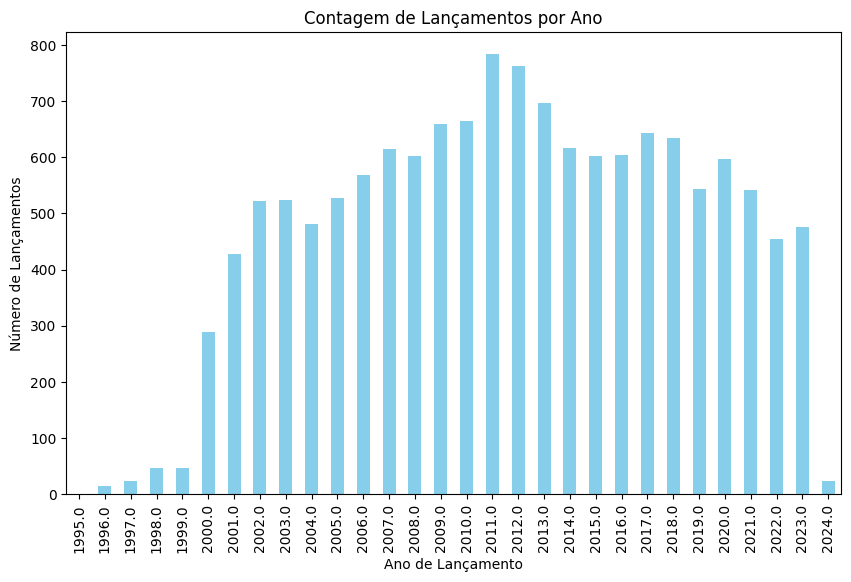

In [215]:
plt.figure(figsize=(10, 6))
df_auxiliar['Ano de Lançamento'].dt.year.value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Lançamentos')
plt.title('Contagem de Lançamentos por Ano')
plt.show()

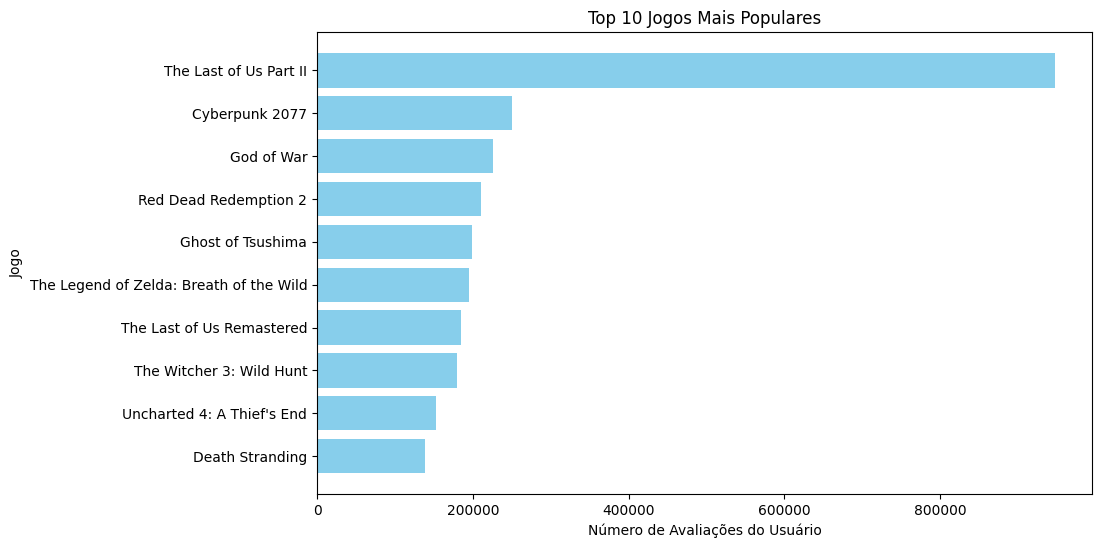

In [244]:
dados_orga = df_auxiliar.sort_values(by='Pontuaçaõ geral', ascending=False)

# Selecionar os top 10 jogos mais populares
top_n_games = dados_orga.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_n_games['Título'], top_n_games['Pontuaçaõ geral'], color='skyblue')
plt.xlabel('Número de Avaliações do Usuário')
plt.ylabel('Jogo')
plt.title('Top 10 Jogos Mais Populares')
plt.gca().invert_yaxis()  # Inverter o eixo y para que o jogo mais popular fique no topo
plt.show()

**Conclusão sobre o jogo mais popular.**

🎮 Seria The last of us parte 2 um outlier? Ou realmente repercutiu a ponto de tantas pessoas fazerem questão de deixar sua avaliação (positiva ou negativa) em comparação com os outros?
Lembrando que Cyberpunk 2077 e God of War também foram jogos que causaram bastante repercussão, seja por expectativas criadas nos usuários ou decisões narrativas. Mas nenhum desses teve uma popularidade tão alta quanto TLOU parte 2. 🕹️

**Falta:**
Decidir o que fazer com os NaN (isso está impossibilitando que transforme valores de algumas colunas para inteiro);

Criar coluna de ranking;

Transformar coluna de ano de lançamento e Ranking  para inteiro;

Traduzir nome das colunas para o português(?);

Classificar colunas (nominal ou numeral, discreta, qualitativa ou ordinal).

In [255]:
colunas_nominais = ['Título', 'Desenvolvedor', 'Editora', 'Gêneros', 'Gêneros Separados', 'Informações das Plataformas']
colunas_numericas = ['Avaliação do Produto', 'Pontuação do Usuário', 'Número de Avaliações do Usuário', 'Somente o ano de lancamento', 'Pontuaçaõ geral']

for coluna in df_auxiliar.columns:
    if coluna in colunas_nominais:
        tipo = 'nominal'
    elif coluna in colunas_numericas:
        tipo = 'numérica'
    else:
        tipo = 'Data'  # Adicione classificação para outros tipos de dados, como datas
    print(f'A coluna "{coluna}" é do tipo {tipo}.')

A coluna "Título" é do tipo nominal.
A coluna "Ano de Lançamento" é do tipo Data.
A coluna "Desenvolvedor" é do tipo nominal.
A coluna "Editora" é do tipo nominal.
A coluna "Gêneros" é do tipo nominal.
A coluna "Gêneros Separados" é do tipo nominal.
A coluna "Avaliação do Produto" é do tipo numérica.
A coluna "Pontuação do Usuário" é do tipo numérica.
A coluna "Número de Avaliações do Usuário" é do tipo numérica.
A coluna "Informações das Plataformas" é do tipo nominal.
A coluna "Pontuaçaõ geral" é do tipo numérica.
A coluna "Somente o ano de lancamento " é do tipo Data.


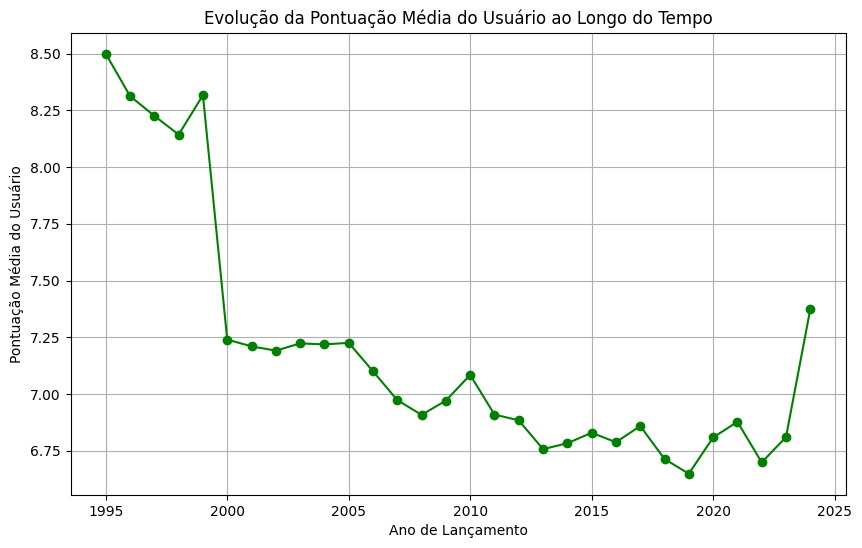

In [216]:
plt.figure(figsize=(10, 6))
df_auxiliar.groupby(df_auxiliar['Ano de Lançamento'].dt.year)['Pontuação do Usuário'].mean().plot(marker='o', color='green')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Pontuação Média do Usuário')
plt.title('Evolução da Pontuação Média do Usuário ao Longo do Tempo')
plt.grid(True)
plt.show()

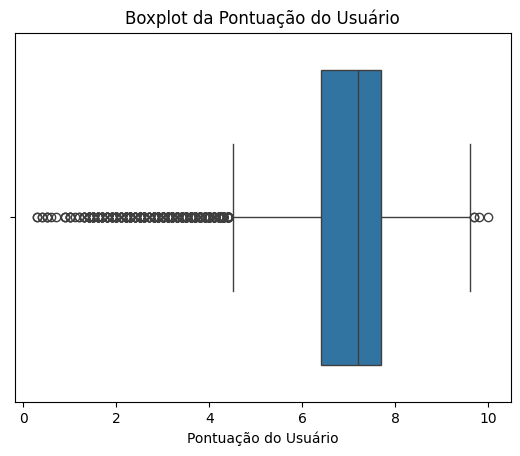

In [256]:
sns.boxplot(x=df_auxiliar['Pontuação do Usuário'])
plt.xlabel('Pontuação do Usuário')
plt.title('Boxplot da Pontuação do Usuário')
plt.show()
